In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

In [0]:
class SigmoidNeuron :
  def __init__(self):
    self.b=None
    self.w=None

  def perceptron(self,x):
    return np.dot(x,self.w.T)+self.b

  def sigmoid(self,x):
    return 1.0/(1.0+np.exp(-x))
  
  def grad_w_mse (self,x,y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y)*y_pred*(1 - y_pred)*x

  def grad_b_mse (self,x,y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y)*y_pred*(1 - y_pred)

  def fit(self,X,Y,epochs=1,learning_rate=.25,initialize=True,loss_fn="mse",display_loss=False):

    if initialize :
      self.w = np.random.randn(1,X.shape[1]);
      self.b = 0

    if display_loss:
      loss = {}

    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw=0.0;
      db=0.0;
      for x,y in zip(X,Y):
        if loss_fnc == "mse":
          dw += self.grad_w(x,y)
          db += self.grad_b(x,y)

      m = X.shape[1]
      self.w -= learning_rate * dw/m
      self.b -= learning_rate * db/m

      if display_loss:
        if loss_fnc == "mse":
          y_pred = self.sigmoid(self.perceptron(X))
          loss[i] = mean_squared_error(Y,y_pred)

    if display_loss:
      plt.plot(loss.values)
      plt.xlabel('Epochs')
      if loss_fnc == "mse":
        plt.ylabel("Mean Square Error")
      elif loss_fnc == "ce":
        plt.ylabel("Log Loss")
      plt.show()

  def predict(self,X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)


In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

#Generate Data

In [29]:
data, labels = make_blobs(n_samples=1000,n_features=2, centers=4,random_state = 0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


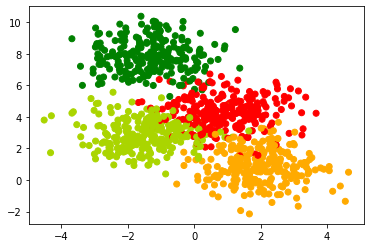

In [30]:
plt.scatter(data[:,0],data[:,1],c=labels,cmap=my_cmap)
plt.show()

In [0]:
labesl_org = labels
labels = np.mod(labels,2)

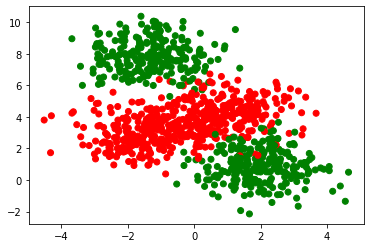

In [32]:
plt.scatter(data[:,0],data[:,1],c=labels,cmap=my_cmap)
plt.show()

In [0]:
X_train,X_test,y_train,y_test = train_test_split(data, labels, stratify=labels, random_state=0)
